In [3]:
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Data for each filter
data_b = {
    "Airmass": [1.29910872708, 1.36141816757, 1.50498912204, 1.77435329864],
    "Z": [27.07537867803222, 27.082915522694023, 27.000192927310618, 26.903442937148288],
    "Z Error": [0.09211466424465241, 0.10045230725666923, 0.0792313024761394, 0.06853692064228088]
}
data_v = {
    "Airmass": [1.29636057409, 1.35117580144, 1.48271201828, 1.73625197253],
    "Z": [28.103366610436023, 28.155080947336696, 28.042006996781744, 28.05027729308603],
    "Z Error": [0.12743625460933378, 0.11081013698866359, 0.13420559865069975, 0.10554435174118225]
}
data_r = {
    "Airmass": [1.30251975605, 1.35593709572, 1.50286457265, 1.81436066349],
    "Z": [27.889343848147526, 27.905377989938373, 27.886322485404065, 27.82527023692205],
    "Z Error": [0.23613771826098728, 0.08786020598879796, 0.08908686658630363, 0.08585617713251627]
}
data_i = {
    "Airmass": [1.30662842941, 1.36646202666, 1.52456664101, 1.85706167933],
    "Z": [27.623408469680886, 27.083625940589275, 27.284349683426022, 26.835183918916012],
    "Z Error": [0.711666942965237, 0.27757752395385965, 0.3830061933472816, 0.3091417300151204]
}



Beta: [-0.38603084 27.58755154]
Beta Std Error: [0.03848337 0.0595018 ]
Beta Covariance: [[ 0.0486004  -0.07456066]
 [-0.07456066  0.11618604]]
Residual Variance: 0.030472367906476616
Inverse Condition #: 0.0026655697179325806
Reason(s) for Halting:
  Sum of squares convergence


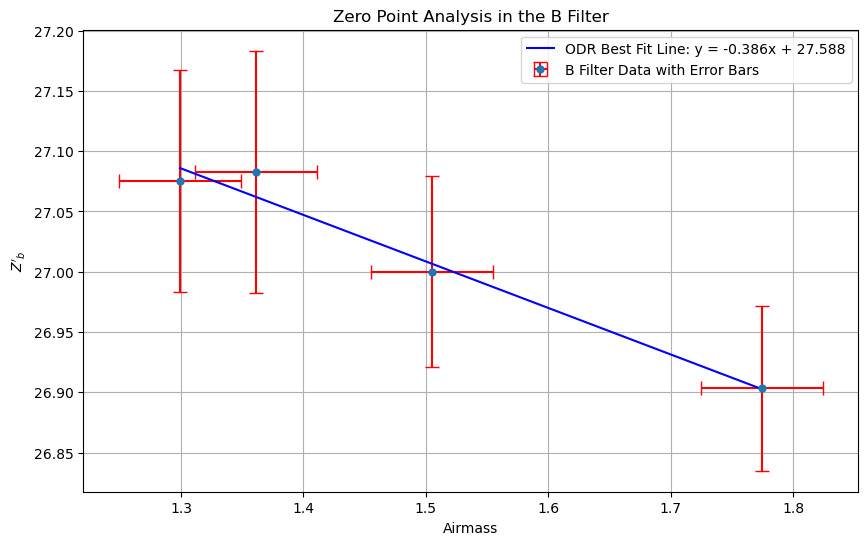

Y-intercept (Zero Point Value): 27.587551538620627
Standard Error of the Intercept: 0.05950179629040959


In [16]:
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt
import numpy as np

# Data for the B filter
data_b = {
    "Airmass": [1.29910872708, 1.36141816757, 1.50498912204, 1.77435329864],
    "Z": [27.07537867803222, 27.082915522694023, 27.000192927310618, 26.903442937148288],
    "Z Error": [0.09211466424465241, 0.10045230725666923, 0.0792313024761394, 0.06853692064228088]
}

# Preparing ODR data
x = np.array(data_b['Airmass'])
y = np.array(data_b['Z'])
x_err = np.full_like(x, 0.05)  # Assuming small non-zero errors if unknown
y_err = np.array(data_b["Z Error"])

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial parameters
initial_slope, initial_intercept = np.polyfit(x, y, 1)
odr = ODR(data, linear_model, beta0=[initial_slope, initial_intercept])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label=f'ODR Best Fit Line: y = {out.beta[0]:.3f}x + {out.beta[1]:.3f}')
plt.xlabel('Airmass')
plt.ylabel(r"$Z'_b$")
plt.title('Zero Point Analysis in the B Filter')
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)


Beta: [-0.18929275 28.3706394 ]
Beta Std Error: [0.12589166 0.18823856]
Beta Covariance: [[ 0.10808027 -0.16043433]
 [-0.16043433  0.24164044]]
Residual Variance: 0.14663834369258305
Inverse Condition #: 0.0011597390196545522
Reason(s) for Halting:
  Sum of squares convergence


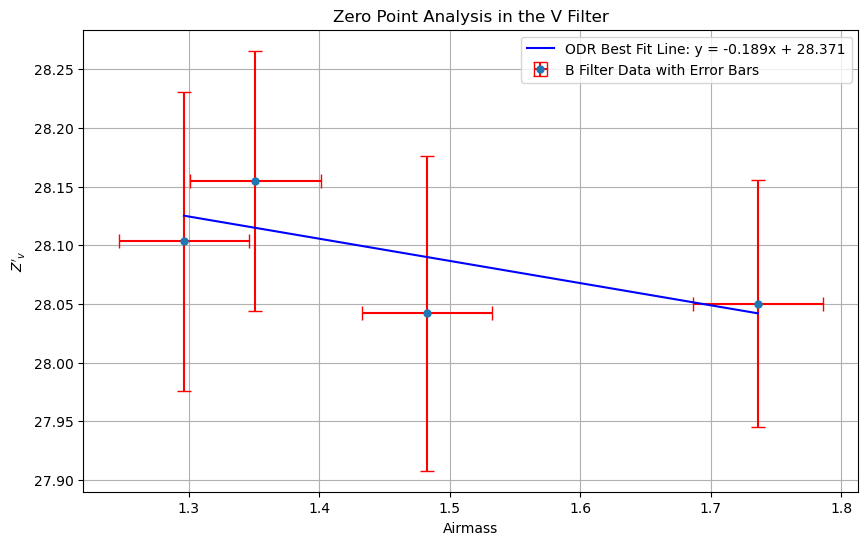

Y-intercept (Zero Point Value): 28.37063939512958
Standard Error of the Intercept: 0.18823855660571737


In [17]:
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt
import numpy as np

# Data for the B filter
data_v = {
    "Airmass": [1.29636057409, 1.35117580144, 1.48271201828, 1.73625197253],
    "Z": [28.103366610436023, 28.155080947336696, 28.042006996781744, 28.05027729308603],
    "Z Error": [0.12743625460933378, 0.11081013698866359, 0.13420559865069975, 0.10554435174118225]
}

# Preparing ODR data
x = np.array(data_v['Airmass'])
y = np.array(data_v['Z'])
x_err = np.full_like(x, 0.05)  # Assuming small non-zero errors if unknown
y_err = np.array(data_v["Z Error"])

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial parameters
initial_slope, initial_intercept = np.polyfit(x, y, 1)
odr = ODR(data, linear_model, beta0=[initial_slope, initial_intercept])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label=f'ODR Best Fit Line: y = {out.beta[0]:.3f}x + {out.beta[1]:.3f}')
plt.xlabel('Airmass')
plt.ylabel(r"$Z'_v$")
plt.title('Zero Point Analysis in the V Filter')
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)

Beta: [-0.17007464 28.13599648]
Beta Std Error: [0.02285981 0.03573073]
Beta Covariance: [[ 0.06407019 -0.099352  ]
 [-0.099352    0.15652895]]
Residual Variance: 0.00815622321270387
Inverse Condition #: 0.000996921228168299
Reason(s) for Halting:
  Sum of squares convergence


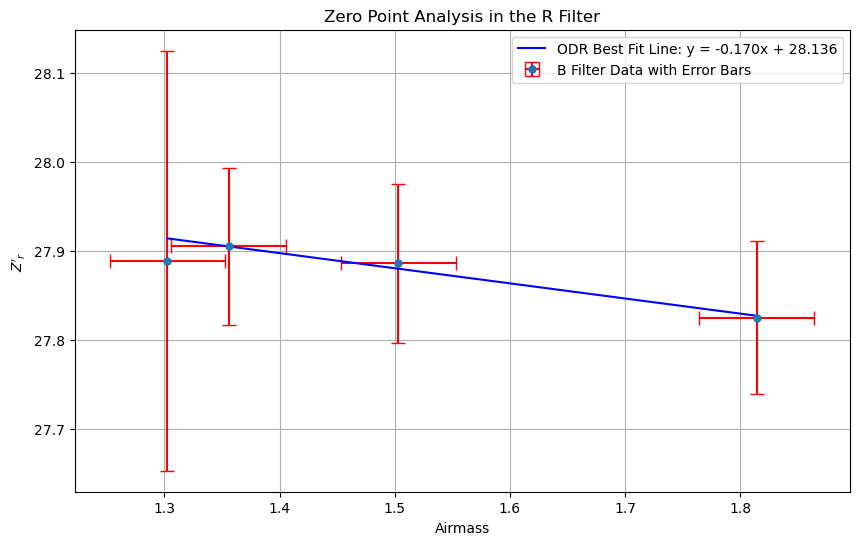

Y-intercept (Zero Point Value): 28.13599648334688
Standard Error of the Intercept: 0.035730729590938044


In [19]:
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt
import numpy as np

# Data for the B filter
data_r = {
    "Airmass": [1.30251975605, 1.35593709572, 1.50286457265, 1.81436066349],
    "Z": [27.889343848147526, 27.905377989938373, 27.886322485404065, 27.82527023692205],
    "Z Error": [0.23613771826098728, 0.08786020598879796, 0.08908686658630363, 0.08585617713251627]
}

# Preparing ODR data
x = np.array(data_r['Airmass'])
y = np.array(data_r['Z'])
x_err = np.full_like(x, 0.05)  # Assuming small non-zero errors if unknown
y_err = np.array(data_r["Z Error"])

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial parameters
initial_slope, initial_intercept = np.polyfit(x, y, 1)
odr = ODR(data, linear_model, beta0=[initial_slope, initial_intercept])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label=f'ODR Best Fit Line: y = {out.beta[0]:.3f}x + {out.beta[1]:.3f}')
plt.xlabel('Airmass')
plt.ylabel(r"$Z'_r$")
plt.title('Zero Point Analysis in the R Filter')
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)

Beta: [-0.71465625 28.19072   ]
Beta Std Error: [0.48651176 0.76458835]
Beta Covariance: [[ 0.66009935 -1.02734676]
 [-1.02734676  1.63033923]]
Residual Variance: 0.35857282855010053
Inverse Condition #: 0.007698433689234565
Reason(s) for Halting:
  Sum of squares convergence


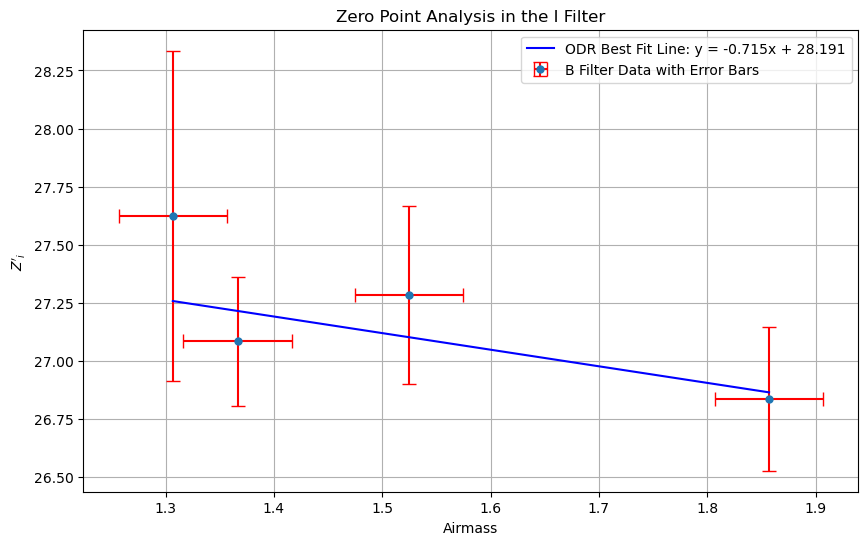

Y-intercept (Zero Point Value): 28.190719997534522
Standard Error of the Intercept: 0.7645883529560744


In [18]:
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt
import numpy as np

# Data for the B filter
data_i = {
    "Airmass": [1.30662842941, 1.36646202666, 1.52456664101, 1.85706167933],
    "Z": [27.623408469680886, 27.083625940589275, 27.284349683426022, 26.835183918916012],
    "Z Error": [0.711666942965237, 0.27757752395385965, 0.3830061933472816, 0.3091417300151204]
}

# Preparing ODR data
x = np.array(data_i['Airmass'])
y = np.array(data_i['Z'])
x_err = np.full_like(x, 0.05)  # Assuming small non-zero errors if unknown
y_err = np.array(data_i["Z Error"])

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial parameters
initial_slope, initial_intercept = np.polyfit(x, y, 1)
odr = ODR(data, linear_model, beta0=[initial_slope, initial_intercept])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label=f'ODR Best Fit Line: y = {out.beta[0]:.3f}x + {out.beta[1]:.3f}')
plt.xlabel('Airmass')
plt.ylabel(r"$Z'_i$")
plt.title('Zero Point Analysis in the I Filter')
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)